#RMSLE(Root Mean Squared Logarithmic Error)

RMSLE

과대평가된 항목보다는 과소평가된 항목에 패털티를 준다
오차(Error)를 제곱(Square)해서 평균(Mean)한 값의 제곱근(Root)으로 값이 작을수록 정밀도가 높다
0에 가까운 값이 나올수록 정밀도가 높은 값이다

$$\sqrt{\frac{1}{n}\sum_{i=1}^n(log(p_i + 1) - log(a_i + 1))^2}$$




* n is the number of hours iin the test set
* $p_i$ is your predicted count
* $a_i$ is the actual count
* log(x) is the natural logarithm
* 잔차(residual)에 대한 평균에 로그를 씌운 값이다. => 과대 평가된 항복모다 과소 평가된 항목에 패널티를 주기위해
* 정답에 대한 오류를 숫자로 나타낸 값으로 값이 클수록 오차가 크다는 의미이다
* 값이 작을수록 오류가 적다는 의미를 나타낸다


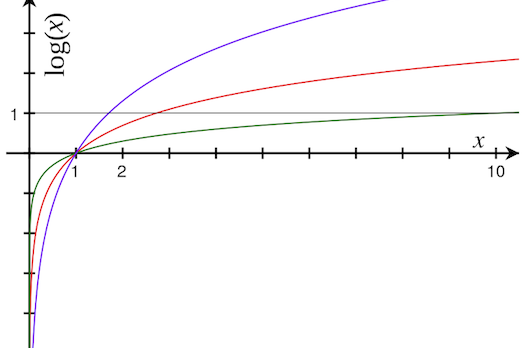


그래프를 보면 0에 가까울수록 오차가 적어지고 커질수록 오차가 커지는형태를 볼수 있다


$$\sqrt{\frac{1}{n}\sum_{i=1}^n(log(p_i + 1) - log(a_i + 1))^2}$$


rmsle수식 에 대한 두가지 코드

In [ ]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))


출처 : https://www.kaggle.com/code/viveksrinivasan/eda-ensemble-model-top-10-percentile/notebook

In [ ]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values, convertExp=True):

    if convertExp:
        predicted_values = np.exp(predicted_values),
        actual_values = np.exp(actual_values)
        
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    # 값이 0일 수도 있어서 로그를 취했을 때 마이너스 무한대가 될 수도 있기 때문에 1을 더해 줌
    # 로그를 씌워주는 것은 정규분포로 만들어주기 위해
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)
    
    # 평균을 낸다.
    mean_difference = difference.mean()
    
    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)
    
    return score

출처 : https://github.com/corazzon/KaggleStruggle/blob/master/bike-sharing-demand/bike-sharing-demand-ensemble-model.ipynb